In [2]:
#Scraping data of products and building a data frame. 
# I used VPN (american server) in order to access the titles of the products in English. 
#The code was though unstable for unknown reasons. I had to make some changes on it after the presentation to make sure it runs okay so the data here is different from the powerpoint. 
#Please refer to the excel file titled "project_1018" to see the original dataframe.

import requests
import pandas as pd
from bs4 import BeautifulSoup as soup

header_1 = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'}

whey_list = []
url = 'https://www.iherb.com/c/whey-protein?p='

for page in range(1,10):
    
    r = requests.get(url + str(page))
    bsobj = soup(r.text, "html.parser")
    whey = bsobj.findAll('div',{'class':'product-inner product-inner-wide'})
    for item in whey:
        dict_1 = {
        "title" : item.find('div',{"class":"product-title"}).text,
        "price" : item.find('span',{"class":"price"}).text,
        "stars" : item.find('a',{"class":"rating-count"}).get("title")
        }
        whey_list.append(dict_1)
   


df = pd.DataFrame(whey_list)

print("Fin.")
print (df)


Fin.
                                                 title       price  \
0    \nOptimum Nutrition, Gold Standard 100% Whey, ...  \n$89.95\n   
1    \nCalifornia Gold Nutrition, SPORT - Whey Prot...  \n$23.00\n   
2    \nOptimum Nutrition, Gold Standard 100% Whey, ...  \n$55.58\n   
3    \nLake Avenue Nutrition, Whey Protein + Probio...  \n$60.00\n   
4    \nCalifornia Gold Nutrition, 100% Whey Protein...  \n$73.00\n   
..                                                 ...         ...   
211  \nQuest Nutrition, Protein Powder, Chocolate M...  \n$44.14\n   
212  \nRSP Nutrition, TrueFit, Grass-Fed Protein Sh...  \n$57.88\n   
213  \nPEScience, Select Protein, Protein Powder Dr...  \n$36.99\n   
214  \nOptimum Nutrition, Gold Standard 100% Whey, ...  \n$55.66\n   
215  \nBPI Sports, ISO HD, 100% Pure Isolate Protei...  \n$81.60\n   

                     stars  
0    4.7/5 - 24734 Reviews  
1    4.6/5 - 14858 Reviews  
2    4.7/5 - 24734 Reviews  
3     4.6/5 - 1458 Reviews  
4     4.5

In [3]:
#extract the numeric value from the price column and create a new column
df['prices in USD'] = df['price'].dropna().apply(lambda x: str(x).split("$")[1])

In [6]:
# keep only the 5 pound version of all products
df_whey5lb = df[df["title"].str.contains(" 5 lb")]

In [13]:
# extract the numerebr of stars out of "stars" column  and create a new column
df_whey5lb['Stars out of 5'] = df_whey5lb['stars'].dropna().apply(lambda x: str(x).split("/5")[0])
df_whey5lb['Review count'] = df_whey5lb['stars'].dropna().apply(lambda x: str(x).split(" - ")[1])
df_whey5lb['Review count'] = df_whey5lb['Review count'].dropna().apply(lambda x: str(x).split(" Review")[0])

In [14]:
df_whey5lb = df_whey5lb.astype({'prices in USD':'float'})
df_whey5lb = df_whey5lb.astype({'Stars out of 5':'float'})
df_whey5lb = df_whey5lb.astype({'Review count':'int'})
print(df_whey5lb.dtypes)

title              object
price              object
stars              object
prices in USD     float64
Stars out of 5    float64
Review count        int32
dtype: object


In [15]:
del df_whey5lb['price']

In [16]:
del df_whey5lb['stars']

In [18]:
# arrange the products in descending order of the number of reviews they have
df_whey5lb = df_whey5lb.sort_values("Review count", axis = 0, ascending = False)

In [23]:
# extract the flacours of the product from the "title" column and create a new column
key_word = ['Chocolate', 'Strawberry', 'Vanilla', 'Mocha','Banana', 
        'Cookies', "Unflavored"]

df_whey5lb['flavours'] = df_whey5lb['title'].str.findall('|'.join(key_word))

C:\Users\jonas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review count'>

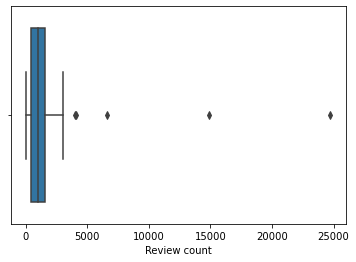

In [26]:
# box plot to see if there are outliers
import seaborn as sns
sns.boxplot(df_whey5lb['Review count'])


In [27]:
#remove outliers
df_whey5lb = df_whey5lb.drop(df.index [ [ 0,7,4,24] ])

In [28]:
df_whey5lb = df_whey5lb.drop(df.index [ [39] ])

In [29]:
df_whey5lb = df_whey5lb.drop(df.index [ [16] ])

In [32]:
df_whey5lb = df_whey5lb.drop(df.index [ [38] ]) # remove two more outliers than the original data frame

In [35]:
df_whey5lb = df_whey5lb.drop(df.index [ [44] ])

C:\Users\jonas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Review count'>

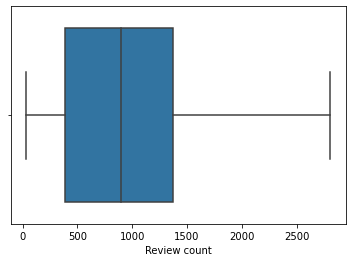

In [36]:
#box plot after removal of outliers
sns.boxplot(df_whey5lb['Review count'])

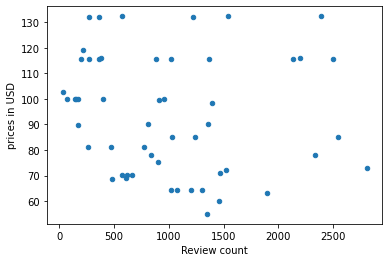

In [37]:
#scatter plot #1
import matplotlib.pyplot as plt
scatter_plot = df_whey5lb.plot.scatter(x='Review count',y='prices in USD')
scatter_plot.plot()
plt.show()

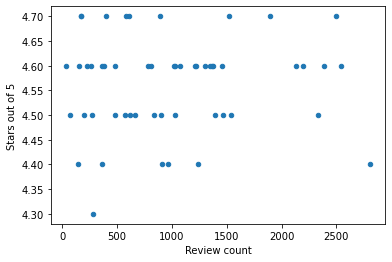

In [39]:
#scatter plot #2
scatter_plot_2 = df_whey5lb.plot.scatter(x='Review count',y='Stars out of 5')
scatter_plot_2.plot()
plt.show()

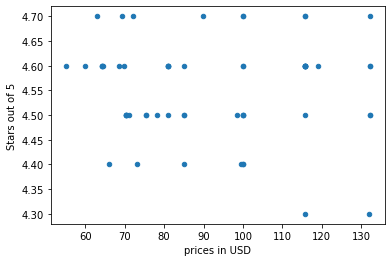

In [67]:
# scatter plot #3
scatter_plot_3 = df_whey5lb.plot.scatter(x='prices in USD',y='Stars out of 5')
scatter_plot_3.plot()
plt.show()

In [77]:
# turn the whole "flavours" column into string 
df_whey5lb = df_whey5lb.astype({'flavours':'str'})

<AxesSubplot:title={'center':'Popularity by Flavours'}, ylabel='reviews'>

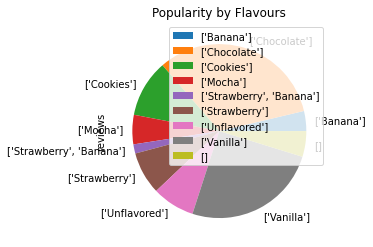

In [78]:
# pie chart of flavours and their popularity
df_whey5lb.groupby(['flavours']).sum().plot(kind='pie', y='Review counts',title='Popularity by Flavours')